# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

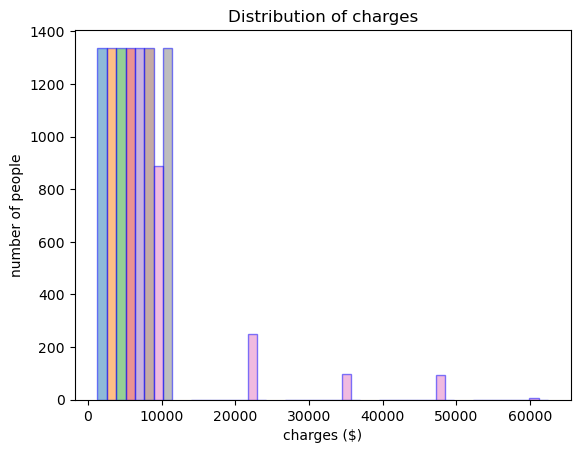

In [16]:
_ = plt.hist(medical, bins=5, edgecolor='blue', alpha=0.5)
_ = plt.xlabel('charges ($)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of charges')
plt.show()

In [12]:
mean_value = np.mean(medical)
print(f"Mean : {mean_value}")

mean_charges = np.mean(medical['charges'])
print(f"Mean of charges : {mean_charges}")

std_dev_value = np.std(medical, ddof=1) #ddof=1 is for sample standard deviation
print(f"Standard Deviation (sample): {std_dev_value}")

Mean : 1668.0248146262145
Mean of charges : 13270.422265141257
Standard Deviation (sample): age                  14.049960
sex                   0.500160
bmi                   6.098187
children              1.205493
smoker                0.403694
region                1.104885
charges           12110.011237
insuranceclaim        0.492871
dtype: float64


C:\Users\pande\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__
Sample Mean: 13270.42
Hypothesized Mean: 12000
T-statistic: 3.8374
P-value: 0.9999

Conclusion: Fail to reject the null hypothesis.
There is not enough statistically significant evidence to suggest that the true average charge is less than 12,000.

In [24]:
import pandas as pd
from scipy import stats

# 1. Load the data from the CSV file
try:
    df = pd.read_csv('data/insurance2.csv')
except FileNotFoundError:
    print("Error: The file 'your_data.csv' was not found.")
    exit()
charges = df['charges']

# 2. Define the null hypothesis and alternative hypothesis
# The administrator is concerned the mean has FALLEN BELOW 12,000.
# Null Hypothesis (H0): The population mean charge is >= 12,000
# Alternative Hypothesis (HA): The population mean charge is < 12,000
hypothesized_mean = 12000

# 3. Perform the one-sample t-test
# We specify 'alternative="less"' for a one-tailed test
t_statistic, p_value = stats.ttest_1samp(a=charges, popmean=hypothesized_mean, alternative='less')

# 4. Interpret the results
alpha = 0.05  # Standard significance level

print(f"Sample Mean: {charges.mean():.2f}")
print(f"Hypothesized Mean: {hypothesized_mean}")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}\n")

if p_value < alpha:
    print("Conclusion: Reject the null hypothesis.")
    print("There is statistically significant evidence to suggest that the true average charge is less than 12,000.")
else:
    print("Conclusion: Fail to reject the null hypothesis.")
    print("There is not enough statistically significant evidence to suggest that the true average charge is less than 12,000.")


Sample Mean: 13270.42
Hypothesized Mean: 12000
T-statistic: 3.8374
P-value: 0.9999

Conclusion: Fail to reject the null hypothesis.
There is not enough statistically significant evidence to suggest that the true average charge is less than 12,000.


__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__
In this example, a one-sided interval testing for a potential negative outcome is likely the most direct approach since administrator is concerned that the actual average charge has fallen below 12,000.

In [27]:
try:
    df = pd.read_csv('data/insurance2.csv')
    data_column = "charges"
    data = df[data_column]
except FileNotFoundError:
    print("Error: The CSV file was not found. Please check the file name and path.")
    exit()
except KeyError:
    print(f"Error: The column '{data_column}' was not found in the CSV. Please check the column name.")
    exit()

# Set the confidence level
confidence_level = 0.95
alpha = 1 - confidence_level

# Calculate sample statistics
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)  # ddof=1 for sample standard deviation
sample_size = len(data)
standard_error = sample_std / np.sqrt(sample_size)
degrees_of_freedom = sample_size - 1


# For a one-sided 95% CI, we need the t-value for alpha = 0.05
# Assuming the concern is about the value being *less* than some benchmark
t_critical_one_sided = stats.t.ppf(1 - alpha, df=degrees_of_freedom)

print("--- Critical Values ---")
print(f"One-sided critical value (t*): {t_critical_one_sided:.4f}")

# --- Calculate the Confidence Intervals ---
# Margin of error
margin_of_error_one_sided = t_critical_one_sided * standard_error

# One-sided 95% CI 
# This gives the lower bound of the interval.
ci_one_sided_lower = (sample_mean - margin_of_error_one_sided, np.inf)

print("--- Confidence Intervals ---")
print(f"Sample Mean: {sample_mean:.4f}")
print(f"95% One-Sided (Lower Bound) Confidence Interval: ({ci_one_sided_lower[0]:.4f}, inf)")


--- Critical Values ---
One-sided critical value (t*): 1.6460
--- Confidence Intervals ---
Sample Mean: 13270.4223
95% One-Sided (Lower Bound) Confidence Interval: (12725.4872, inf)


In [ ]:
Since 95% One-Sided (Lower Bound) Confidence Interval: (12725.4872, inf) and administrator concern is regarding charges falling below 12,000 which is lessser than the Lower Bound value, doesn't look like administrator should be concerned since 95% One-Sided (Lower Bound) Confidence Interval: (12725.4872, inf).

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

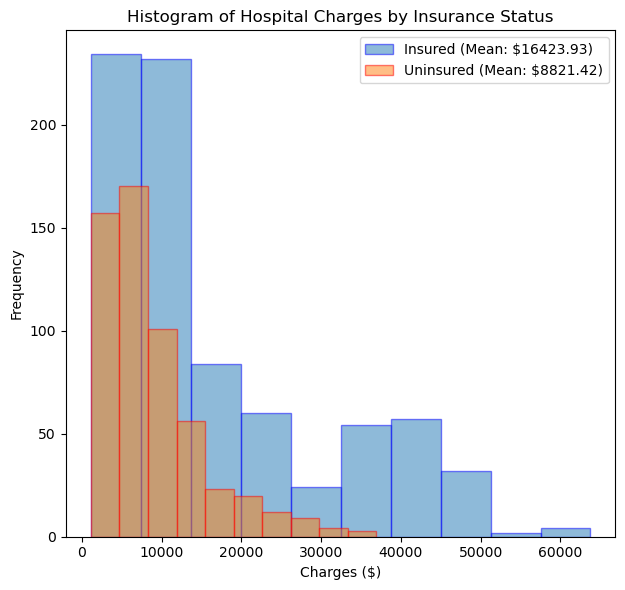


--- Independent T-Test Results ---
Insured patients (n=783): Mean = $16423.93, SD = $14045.93
Uninsured patients (n=555): Mean = $8821.42, SD = $6446.51
Mean difference: $7602.51
T-statistic: 13.2980
P-value: 0.0000

Decision: Reject the null hypothesis (p < 0.05)
Conclusion: There is significant evidence that people with insurance
are charged differently than those without insurance.


In [33]:


# Split the data into two groups
insured = medical[medical['insuranceclaim'] == 1]['charges']  
uninsured = medical[medical['insuranceclaim'] == 0]['charges']  

# Calculate basic statistics
insured_mean = insured.mean()
uninsured_mean = uninsured.mean()
insured_std = insured.std()
uninsured_std = uninsured.std()

# Visualize the distributions
plt.figure(figsize=(12, 6))

# Create histograms
plt.subplot(1, 2, 2)
plt.hist(insured, alpha=0.5, label=f'Insured (Mean: ${insured_mean:.2f})', edgecolor='blue')
plt.hist(uninsured, alpha=0.5, label=f'Uninsured (Mean: ${uninsured_mean:.2f})', edgecolor='red')
plt.xlabel('Charges ($)')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Hospital Charges by Insurance Status')

plt.tight_layout()
plt.show()

# Perform independent t-test
# H0: μ_insured = μ_uninsured (no difference in means)
# H1: μ_insured ≠ μ_uninsured (there is a difference in means)
t_stat, p_value = stats.ttest_ind(insured, uninsured, equal_var=False)  # Using Welch's t-test (not assuming equal variances)

print("\n--- Independent T-Test Results ---")
print(f"Insured patients (n={len(insured)}): Mean = ${insured_mean:.2f}, SD = ${insured_std:.2f}")
print(f"Uninsured patients (n={len(uninsured)}): Mean = ${uninsured_mean:.2f}, SD = ${uninsured_std:.2f}")
print(f"Mean difference: ${insured_mean - uninsured_mean:.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nDecision: Reject the null hypothesis (p < 0.05)")
    print("Conclusion: There is significant evidence that people with insurance")
    print("are charged differently than those without insurance.")
else:
    print("\nDecision: Fail to reject the null hypothesis (p ≥ 0.05)")
    print("Conclusion: There is not sufficient evidence to conclude that people with insurance")
    print("are charged differently than those without insurance.")


__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

--- Sample Statistics ---
Insured group: n=783, mean=$16423.93, variance=$197288105.15
Uninsured group: n=555, mean=$8821.42, variance=$41557492.82
Mean difference: $7602.51

--- Manual T-Test Calculation ---
t-statistic: 13.2980
Degrees of freedom: 1169.9962
p-value: 0.0000

--- SciPy T-Test Result ---
t-statistic: 13.2980
p-value: 0.0000

--- Verification ---
Manual t-statistic: 13.2980, SciPy t-statistic: 13.2980
Manual p-value: 0.0000, SciPy p-value: 0.0000
Difference in t-statistic: 0.0000000000
Difference in p-value: 0.0000000000

--- Conclusion ---
Decision: Reject the null hypothesis (p < 0.05)
Conclusion: There is significant evidence that people with insurance
are charged differently than those without insurance.


C:\Users\pande\AppData\Local\Temp\ipykernel_37292\4086593800.py:65: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([insured_array, uninsured_array], labels=['Insured', 'Uninsured'])


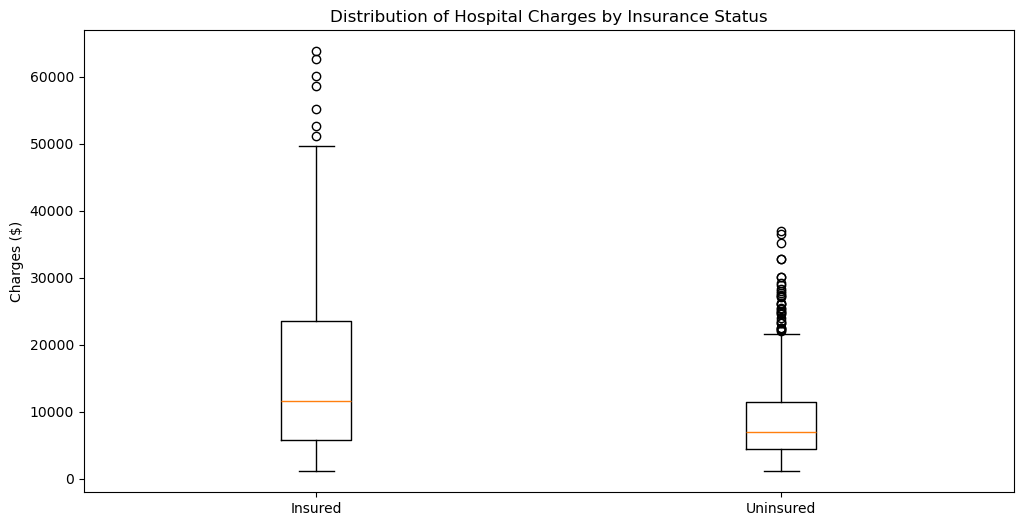

In [34]:
# Split the data into two groups
insured = medical[medical['insuranceclaim'] == 1]['charges']  
uninsured = medical[medical['insuranceclaim'] == 0]['charges'] 

# Convert to numpy arrays for easier calculation
insured_array = np.array(insured)
uninsured_array = np.array(uninsured)

# Calculate basic statistics
n1 = len(insured_array)
n2 = len(uninsured_array)
mean1 = np.mean(insured_array)
mean2 = np.mean(uninsured_array)
var1 = np.var(insured_array, ddof=1)  # Using ddof=1 for sample variance
var2 = np.var(uninsured_array, ddof=1)

print("--- Sample Statistics ---")
print(f"Insured group: n={n1}, mean=${mean1:.2f}, variance=${var1:.2f}")
print(f"Uninsured group: n={n2}, mean=${mean2:.2f}, variance=${var2:.2f}")
print(f"Mean difference: ${mean1 - mean2:.2f}")

# MANUAL CALCULATION OF T-TEST (Welch's t-test, not assuming equal variances)
# Calculate the t-statistic manually
t_manual = (mean1 - mean2) / np.sqrt((var1/n1) + (var2/n2))

# Calculate degrees of freedom using Welch-Satterthwaite equation
df_manual = ((var1/n1 + var2/n2)**2) / ((var1/n1)**2/(n1-1) + (var2/n2)**2/(n2-1))

# Calculate the p-value (two-tailed test)
p_manual = 2 * (1 - stats.t.cdf(abs(t_manual), df_manual))

print("\n--- Manual T-Test Calculation ---")
print(f"t-statistic: {t_manual:.4f}")
print(f"Degrees of freedom: {df_manual:.4f}")
print(f"p-value: {p_manual:.4f}")

# USING SCIPY.STATS FOR T-TEST
t_scipy, p_scipy = stats.ttest_ind(insured_array, uninsured_array, equal_var=False)  # Welch's t-test

print("\n--- SciPy T-Test Result ---")
print(f"t-statistic: {t_scipy:.4f}")
print(f"p-value: {p_scipy:.4f}")

# Verify the results match
print("\n--- Verification ---")
print(f"Manual t-statistic: {t_manual:.4f}, SciPy t-statistic: {t_scipy:.4f}")
print(f"Manual p-value: {p_manual:.4f}, SciPy p-value: {p_scipy:.4f}")
print(f"Difference in t-statistic: {abs(t_manual - t_scipy):.10f}")
print(f"Difference in p-value: {abs(p_manual - p_scipy):.10f}")

# Interpret the results
alpha = 0.05
print("\n--- Conclusion ---")
if p_manual < alpha:
    print("Decision: Reject the null hypothesis (p < 0.05)")
    print("Conclusion: There is significant evidence that people with insurance")
    print("are charged differently than those without insurance.")
else:
    print("Decision: Fail to reject the null hypothesis (p ≥ 0.05)")
    print("Conclusion: There is not sufficient evidence to conclude that people with insurance")
    print("are charged differently than those without insurance.")

In [ ]:
 There is significant evidence that people with insurance
are charged differently than those without insurance.

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__
 Z-tests require knowing the population standard deviation (σ), which is rarely available in real-world scenarios. When working with samples, we typically only have the sample standard deviation (s).

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test